# Assignment 3  - Part C


#### Roll Number:

### Task Explanation

In this task, we will perform feature extraction and fine-tuning on a previously trained over a large dataset model. This is a very useful domain of Deep Learning known as Transfer Learning. We don't always have the luxury of time and computational power to adequately train a large model over our dataset. So, we use models which have been trained on large datasets (usually ImageNet) and then fine-tune them on our dataset. The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

Here, we will fine-tune a previously trained model on imagenet to learn and classify three new class: Richshaw, qingqi and Tanga. 


### Dataset



The dataset is divided into training set and testing set. The training set is labeled and contains 80 images for each class (Total 240 images). You have been given unlabeled test set and your task is to predict the class of each test image. The test set contain 853 images.<br>
Some guidelines:<br>
- You are free to extend or augment the training set.<br>
- If you want, you can use a subset of training set as your validation set.<br>
- You must not use the provided test set in any way except for final predictions.<br>

In [ ]:
!git clone https://github.com/MMFa666/VehicleDataset.git

Cloning into 'VehicleDataset'...
remote: Enumerating objects: 1106, done.
remote: Counting objects: 100% (1106/1106), done.
remote: Compressing objects: 100% (1100/1100), done.
remote: Total 1106 (delta 4), reused 1103 (delta 4), pack-reused 0
Receiving objects: 100% (1106/1106), 34.18 MiB | 21.54 MiB/s, done.
Resolving deltas: 100% (4/4), done.


### Models


You can use anyone of the following models for this task. See the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications#functions) for more details.
- VGG
- ResNet
- MobileNet
- EfficientNet

### LeaderBoard

The goal here is to get the maximum performance on test set. For this purpose, we have created a competition on Kaggle where a leaderboard is maintained. You will upload your predictions for test set there and a score will be generated for you. You will be ranked based on your score. You can submit upto 20 times a day with maximum 300 submissions in total.

This part will be evaluated based on your approach and your performance in LeaderBoard. Furthermore, the top student will receive a 5%, 2nd will receive 3% and 3rd will receive 1% bonus.

You are allowed to the following to win:
- Extend your chosen model as you like.
- Extend the training set.
- Augment the training set.
- Play with hyperparameters.
- Preprocess the data as you like.

Competition link [here](https://www.kaggle.com/c/lums-cs437-hw3/)

### Tutuorial Example

You are recommended to follow this [tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning) for this task. All the hints and information required are available here and this task can be easily completed by following it. In this tutorial, they use MobileNet but as mentioned above you are free to use any of the abovementioned models.

### Let The Games Begin!!!

In [ ]:
# make necessary imports here
import cv2
import glob
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, LeakyReLU, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import random
from google.colab.patches import cv2_imshow
from tensorflow import keras
import sklearn

In [ ]:
labels={}
labels['qingqi']=[1,0,0]
labels['rickshaw']=[0,1,0]
labels['tanga']=[0,0,1]

In [ ]:
# define hyperparameters
batch_size = 10
epochs = 40
input_shape = (198,198,3)
base_learning_rate = 0.0001

In [ ]:
# read and preprocess the training data and extract the labels. (If your training data is large then you can also use batch generator like done in PartB.)
# print the shape x and y data
# split into validation set if you desire
training_paths=[]
train_data=[]
for path in glob.glob('/content/VehicleDataset/train/*'):
    training_paths.append(path)
total_train=0
for train_path in training_paths:
  total_images=0
  for images in glob.glob(train_path+'/*'):
    train_data.append(images)
    total_images=total_images+1
  typ=train_path.split('/')[-1]
  total_train=total_train+total_images
  print(typ,':',total_images)
print('total training data',total_train)

validation_set_paths = random.sample(train_data, int(len(train_data)*0.1))
train_data=[ele for ele in train_data if ele not in validation_set_paths]
validation_set_Xs=[]
validation_set_Ys=[]
for random_path in validation_set_paths:
  image=cv2.imread(random_path)
  image=cv2.resize(image,input_shape[0:2])
  # image=cv2.resize(image,input_shape[0:2])
  validation_set_Xs.append(image)
  label=labels[random_path.split('/')[-2]]
  validation_set_Ys.append(label)

validation_set_Xs=np.array(validation_set_Xs,dtype=float)
validation_set_Ys=np.array(validation_set_Ys)
# validation_set_Xs = np.asarray(validation_set_Xs).astype('float32')
# validation_set_Ys = np.asarray(validation_set_Ys).astype('float32')
print('shape of X training data:',input_shape)
print('shape of Y training data:',validation_set_Ys[0].shape)

def batch_generator(train_data,batch_size):
  for i:
      Xs=[]
      Ys=[]
      temp_train_data=train_data
      random_paths=random.sample(train_data,batch_size)
      for random_path in random_paths:
        image=cv2.imread(random_path)
        image=cv2.resize(image,input_shape[0:2])
        Xs.append(image)
        label=labels[random_path.split('/')[-2]]
        Ys.append(label)
      Xs=np.array(Xs)
      Ys=np.array(Ys)
      yield (Xs,Ys)

train_genarator=batch_generator(train_data,batch_size)



rickshaw : 80
qingqi : 80
tanga : 80
total training data 240
shape of X training data: (198, 198, 3)
shape of Y training data: (3,)


In [ ]:
for i in range(11):
  print(train_genarator.__next__())

(array([[[[236, 236, 236],
         [240, 240, 240],
         [247, 247, 247],
         ...,
         [117, 117, 117],
         [155, 155, 155],
         [175, 175, 175]],

        [[240, 240, 240],
         [242, 242, 242],
         [245, 245, 245],
         ...,
         [132, 132, 132],
         [151, 151, 151],
         [161, 161, 161]],

        [[250, 250, 250],
         [247, 247, 247],
         [242, 242, 242],
         ...,
         [162, 162, 162],
         [144, 144, 144],
         [135, 135, 135]],

        ...,

        [[ 67,  49,  50],
         [ 67,  49,  50],
         [ 67,  49,  50],
         ...,
         [ 65,  43,  45],
         [ 65,  43,  45],
         [ 65,  43,  45]],

        [[ 69,  51,  52],
         [ 69,  51,  52],
         [ 70,  52,  53],
         ...,
         [ 72,  50,  52],
         [ 72,  50,  52],
         [ 72,  50,  52]],

        [[ 70,  52,  53],
         [ 71,  53,  54],
         [ 72,  54,  55],
         ...,
         [ 76,  54,  56],
       

StopIteration: ignored

### Feature Extraction

In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

In [ ]:
# intialize the base model here and print the model summary
base_model = tensorflow.keras.applications.MobileNetV2(input_shape=input_shape,
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 198, 198, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 99, 99, 32)   864         input_17[0][0]                   
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 99, 99, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 99, 99, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. 

In [ ]:
# Freeze the base Model
base_model.trainable = False

In [ ]:
# Add your desired classification head and initalize new model
prediction_layer = tensorflow.keras.layers.Dense(units=3,activation='softmax')
global_average_layer = tensorflow.keras.layers.GlobalAveragePooling2D()
drop_out_layer=tensorflow.keras.layers.Dropout(0.2)
leaky_relu_layer=keras.layers.LeakyReLU()
dense_layer=keras.layers.Dense(units=50,activation='sigmoid')
data_augmentation = keras.Sequential([
  keras.layers.RandomFlip('horizontal'),
  keras.layers.RandomRotation(0.2),
])

inputs = tensorflow.keras.Input(shape=input_shape)
x=data_augmentation(inputs)
x = keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = drop_out_layer(x)
x=leaky_relu_layer(x)
x=dense_layer(x)
outputs = prediction_layer(x)
model = tensorflow.keras.Model(inputs, outputs)



In [ ]:
# compile the model and print the summary
model.compile(optimizer=keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 198, 198, 3)]     0         
_________________________________________________________________
sequential_8 (Sequential)    (None, 198, 198, 3)       0         
_________________________________________________________________
tf.math.truediv_8 (TFOpLambd (None, 198, 198, 3)       0         
_________________________________________________________________
tf.math.subtract_8 (TFOpLamb (None, 198, 198, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_8 ( (None, 1280)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1280)              0   

In [ ]:
# fit the model
hist=model.fit(train_genarator,epochs=epochs,batch_size=batch_size,validation_data=(validation_set_Xs,validation_set_Ys),steps_per_epoch=len(train_data)/batch_size)

Epoch 1/40
21/21 [==============================] - 11s 401ms/step - loss: 1.0580 - accuracy: 0.4591 - val_loss: 1.0335 - val_accuracy: 0.5833
Epoch 2/40
21/21 [==============================] - 8s 392ms/step - loss: 0.9851 - accuracy: 0.5455 - val_loss: 1.0189 - val_accuracy: 0.5417
Epoch 3/40
21/21 [==============================] - 9s 399ms/step - loss: 0.9159 - accuracy: 0.6273 - val_loss: 0.9324 - val_accuracy: 0.5833
Epoch 4/40
21/21 [==============================] - 8s 390ms/step - loss: 0.8752 - accuracy: 0.6455 - val_loss: 0.8450 - val_accuracy: 0.6250
Epoch 5/40
21/21 [==============================] - 8s 396ms/step - loss: 0.8171 - accuracy: 0.6864 - val_loss: 0.7935 - val_accuracy: 0.6667
Epoch 6/40
21/21 [==============================] - 8s 394ms/step - loss: 0.7386 - accuracy: 0.8136 - val_loss: 0.7731 - val_accuracy: 0.6667
Epoch 7/40
21/21 [==============================] - 8s 389ms/step - loss: 0.6864 - accuracy: 0.8182 - val_loss: 0.7542 - val_accuracy: 0.7083
Epoch

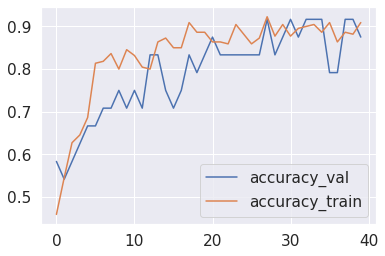

In [ ]:
# plot the loss and accuracy curves
accuracy_val=hist.history['val_accuracy']
accuracy_train=hist.history['accuracy']
plt.plot(list(range(len(accuracy_val))),accuracy_val)

plt.plot(list(range(len(accuracy_train))),accuracy_train)

plt.legend(('accuracy_val','accuracy_train'))

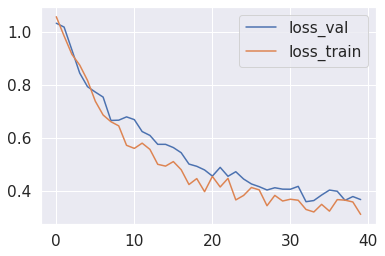

In [ ]:
loss_val=hist.history['val_loss']
loss_train=hist.history['loss']
plt.plot(list(range(len(loss_val))),loss_val)

plt.plot(list(range(len(loss_train))),loss_train)

plt.legend(('loss_val','loss_train'))

### Fine Tuning

In the feature extraction, you were only training a few layers on top of a base model. The weights of the pre-trained network were not updated during training.

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.

In [ ]:
# unfreeze the base model
base_model.trainable = True

In [ ]:
# print the number of layers in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


You should try to fine-tune a small number of top layers rather than the whole MobileNet model. In most convolutional networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, rather than overwrite the generic learning.

In [ ]:
# Decide the number of layers you want to freeze and freeze them.
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
# compile the model again.
# It is advisable to use a lower learning rate here so that updates are not too huge and the model does not overfit.
# print model summary
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 198, 198, 3)]     0         
_________________________________________________________________
sequential_8 (Sequential)    (None, 198, 198, 3)       0         
_________________________________________________________________
tf.math.truediv_8 (TFOpLambd (None, 198, 198, 3)       0         
_________________________________________________________________
tf.math.subtract_8 (TFOpLamb (None, 198, 198, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_8 ( (None, 1280)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1280)              0   

In [ ]:
# fit the model again.
hist_fine_tune=model.fit(train_genarator,epochs=epochs,batch_size=batch_size,validation_data=(validation_set_Xs,validation_set_Ys),steps_per_epoch=len(train_data)/batch_size)

Epoch 1/40
21/21 [==============================] - 16s 603ms/step - loss: 0.3459 - accuracy: 0.8864 - val_loss: 0.4330 - val_accuracy: 0.8333
Epoch 2/40
21/21 [==============================] - 12s 566ms/step - loss: 0.2923 - accuracy: 0.9045 - val_loss: 0.3143 - val_accuracy: 0.8750
Epoch 3/40
21/21 [==============================] - 12s 563ms/step - loss: 0.2233 - accuracy: 0.9500 - val_loss: 0.3084 - val_accuracy: 0.7917
Epoch 4/40
21/21 [==============================] - 12s 565ms/step - loss: 0.2050 - accuracy: 0.9409 - val_loss: 0.2487 - val_accuracy: 0.9167
Epoch 5/40
21/21 [==============================] - 12s 570ms/step - loss: 0.2095 - accuracy: 0.9273 - val_loss: 0.2596 - val_accuracy: 0.8750
Epoch 6/40
21/21 [==============================] - 12s 565ms/step - loss: 0.1808 - accuracy: 0.9545 - val_loss: 0.2433 - val_accuracy: 0.9167
Epoch 7/40
21/21 [==============================] - 12s 566ms/step - loss: 0.1712 - accuracy: 0.9682 - val_loss: 0.2526 - val_accuracy: 0.8750

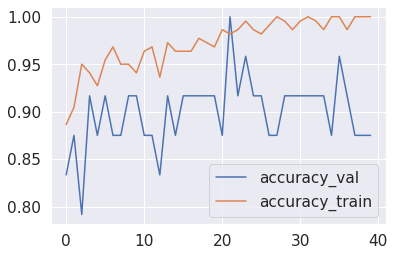

In [ ]:
# plot the loss and accuracy curves again
accuracy_val=hist_fine_tune.history['val_accuracy']
accuracy_train=hist_fine_tune.history['accuracy']
plt.plot(list(range(len(accuracy_val))),accuracy_val)


plt.plot(list(range(len(accuracy_train))),accuracy_train)

plt.legend(('accuracy_val','accuracy_train'))

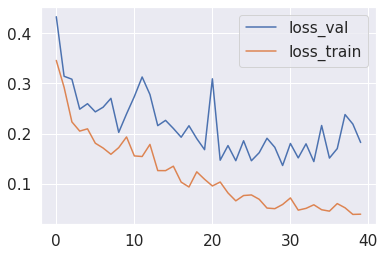

In [ ]:
loss_val=hist_fine_tune.history['val_loss']
loss_train=hist_fine_tune.history['loss']
plt.plot(list(range(len(loss_val))),loss_val)

plt.plot(list(range(len(loss_train))),loss_train)

plt.legend(('loss_val','loss_train'))

### Prediction

Now we will use our model to make predictions on test set. Store the predictions like in sample_submission.csv file. 

sample_submission.csv
- 4 columns
- 1 row for each test image (total 853 rows)
- 1st column = image file name
- 2nd column = probability of the given image being qingqi
- 3rd column = probability of the given image being rickshaw
- 4th column = probability of the given image being tanga

In [ ]:
# Read and preprocess test data. Remeber to store the names of image files
test_paths=[]
for path in glob.glob('/content/VehicleDataset/test/*'):
    test_paths.append(path)
print('total test images',':',len(test_paths))

test_Xs=[]

for i in range(len(test_paths)):
  image=cv2.imread(test_paths[i])
  image=cv2.resize(image,input_shape[0:2])
  test_Xs.append(image)
test_Xs=np.array(test_Xs)

total test images : 853


In [ ]:
# predict on test data (Hint: model.predict())
predictions_prob=model.predict(test_Xs)

In [ ]:
# store the predictions in a .csv file like in sample_submission.csv (Hint: pandas may be helpful here)
lsta=[np.nan for i in range(len(test_paths))]
df=pd.DataFrame({'image file name':lsta,'probability of the given image being qingqi':lsta
                 ,'probability of the given image being rickshaw':lsta,'probability of the given image being tanga':lsta})

x=0
for i in test_paths:
  df.iloc[x,0]=i.split('/')[-1]
  df.iloc[x,1]=predictions_prob[x,0]
  df.iloc[x,2]=predictions_prob[x,1]
  df.iloc[x,3]=predictions_prob[x,2]
  x=x+1

In [ ]:
groud_truth=pd.read_csv('21100220.csv')

In [ ]:
groud_truth.sort_values('id',inplace=True)

In [ ]:
df.sort_values('image file name',inplace=True)

In [ ]:
groud_truth_prediction=np.argmax(np.array(groud_truth[['qingqi','rickshaw','tanga']]),axis=1)

In [ ]:
my_predictions=np.argmax(np.array(df.iloc[:,1:]),axis=1)

In [ ]:
print(np.sum(groud_truth_prediction==my_predictions)/groud_truth_prediction.shape[0])

0.9472450175849941


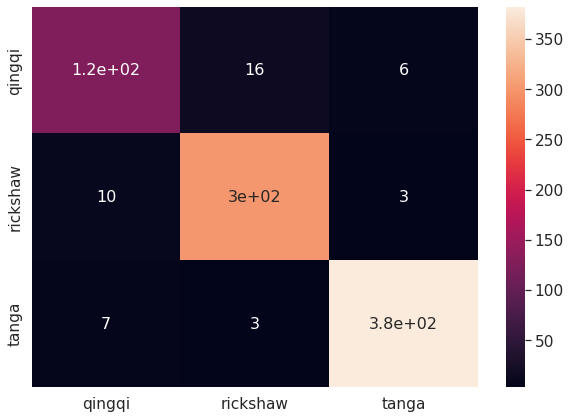

In [ ]:
matrix_confusion=sklearn.metrics.confusion_matrix(groud_truth_prediction,my_predictions)
def plot_confusion_matrix(conf_mat):
    classes = list(labels.keys())
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
    plt.show()
plot_confusion_matrix(matrix_confusion)
